In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.model_selection import train_test_split


In [17]:
data = pd.read_csv("../01_Data/clean_data.csv")
data.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'REGION', 'DOMINIO', 'FACTOR',
       'P102_2', 'P204_NOM', 'P204_TIPO', 'P205_N', 'P205_TOT', 'P206_INI_MES',
       'P206_INI_ANIO', 'P207_FIN_MES', 'P207_FIN_ANIO', 'P208', 'P209_MES',
       'P209_ANIO', 'P210_SUP_1', 'P210_SUP_2', 'P211_1', 'P211_2', 'P211_3',
       'P211_4', 'P211_5', 'P211_6', 'P211_7', 'P211_8', 'P212', 'P213',
       'P217_SUP_1', 'P217_SUP_2', 'P217_SUP_ha', 'P218', 'P219_CANT_1',
       'P219_CANT_2', 'P219_UM', 'P219_UM_COD', 'P219_EQUIV_KG',
       'P220_1_CANT_1', 'P220_1_CANT_2', 'P220_1_PREC_1', 'P220_1_PREC_2',
       'P220_1_VAL', 'P220_1_PRE_KG', 'P220_2_PREC_1', 'P220_2_PREC_2',
       'P220_2_VAL', 'P220_2_PRE_KG', 'P222_1', 'P222_2', 'P222_3', 'P222_4',
       'P222_5', 'P222_6', 'P222_7', 'P223_1', 'P223_2', 'P223_3', 'P223_4',
       'P223_5', 'P223_6', 'P223B_1', 'P223B_2', 'P223B_3', 'P223B_4',
       'P223B_5', 'P223B_6', 'P223B_7', 'P223B_8', 'P220_2', 'P220_3',
       'P220_4', 'P220_5', 'P220_6',

In [18]:
data['high_profit'] = (data['P220_1_VAL'] > data['P220_1_VAL'].median()).astype(int)
data['high_profit'].value_counts()

high_profit
0    15108
1    14986
Name: count, dtype: int64

In [19]:
# Función para clasificar variables como categóricas o numéricas
def classify_variables(data, unique_threshold=10):
    categorical = []
    numerical = []

    for column in data.columns:
        unique_values = data[column].nunique()
        if unique_values <= unique_threshold or data[column].dtype == 'object':
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical, numerical

# Clasificar variables
categorical_variables, numerical_variables = classify_variables(data, unique_threshold=12)

# Resultados
print("Variables categóricas detectadas:")
print(categorical_variables)
print("\nVariables numéricas detectadas:")
print(numerical_variables)

# Resumen descriptivo para variables numéricas
eda_numerical = data[numerical_variables].describe()
print("\nResumen descriptivo de variables numéricas:")
print(eda_numerical)

Variables categóricas detectadas:
['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'REGION', 'DOMINIO', 'P102_2', 'P204_NOM', 'P204_TIPO', 'P205_N', 'P205_TOT', 'P206_INI_MES', 'P206_INI_ANIO', 'P207_FIN_MES', 'P207_FIN_ANIO', 'P208', 'P209_MES', 'P210_SUP_1', 'P211_1', 'P211_2', 'P211_3', 'P211_4', 'P211_5', 'P211_6', 'P211_7', 'P211_8', 'P212', 'P213', 'P219_UM', 'P222_1', 'P222_2', 'P222_3', 'P222_4', 'P222_5', 'P222_6', 'P222_7', 'P223_1', 'P223_2', 'P223_3', 'P223_4', 'P223_5', 'P223_6', 'P223B_1', 'P223B_2', 'P223B_3', 'P223B_4', 'P223B_5', 'P223B_6', 'P223B_7', 'P223B_8', 'high_profit']

Variables numéricas detectadas:
['FACTOR', 'P209_ANIO', 'P210_SUP_2', 'P217_SUP_1', 'P217_SUP_2', 'P217_SUP_ha', 'P218', 'P219_CANT_1', 'P219_CANT_2', 'P219_UM_COD', 'P219_EQUIV_KG', 'P220_1_CANT_1', 'P220_1_CANT_2', 'P220_1_PREC_1', 'P220_1_PREC_2', 'P220_1_VAL', 'P220_1_PRE_KG', 'P220_2_PREC_1', 'P220_2_PREC_2', 'P220_2_VAL', 'P220_2_PRE_KG', 'P220_2', 'P220_3', 'P220_4', 'P220_5', 'P220_6', 'P220_7', 'P2

### Variables Numéricas

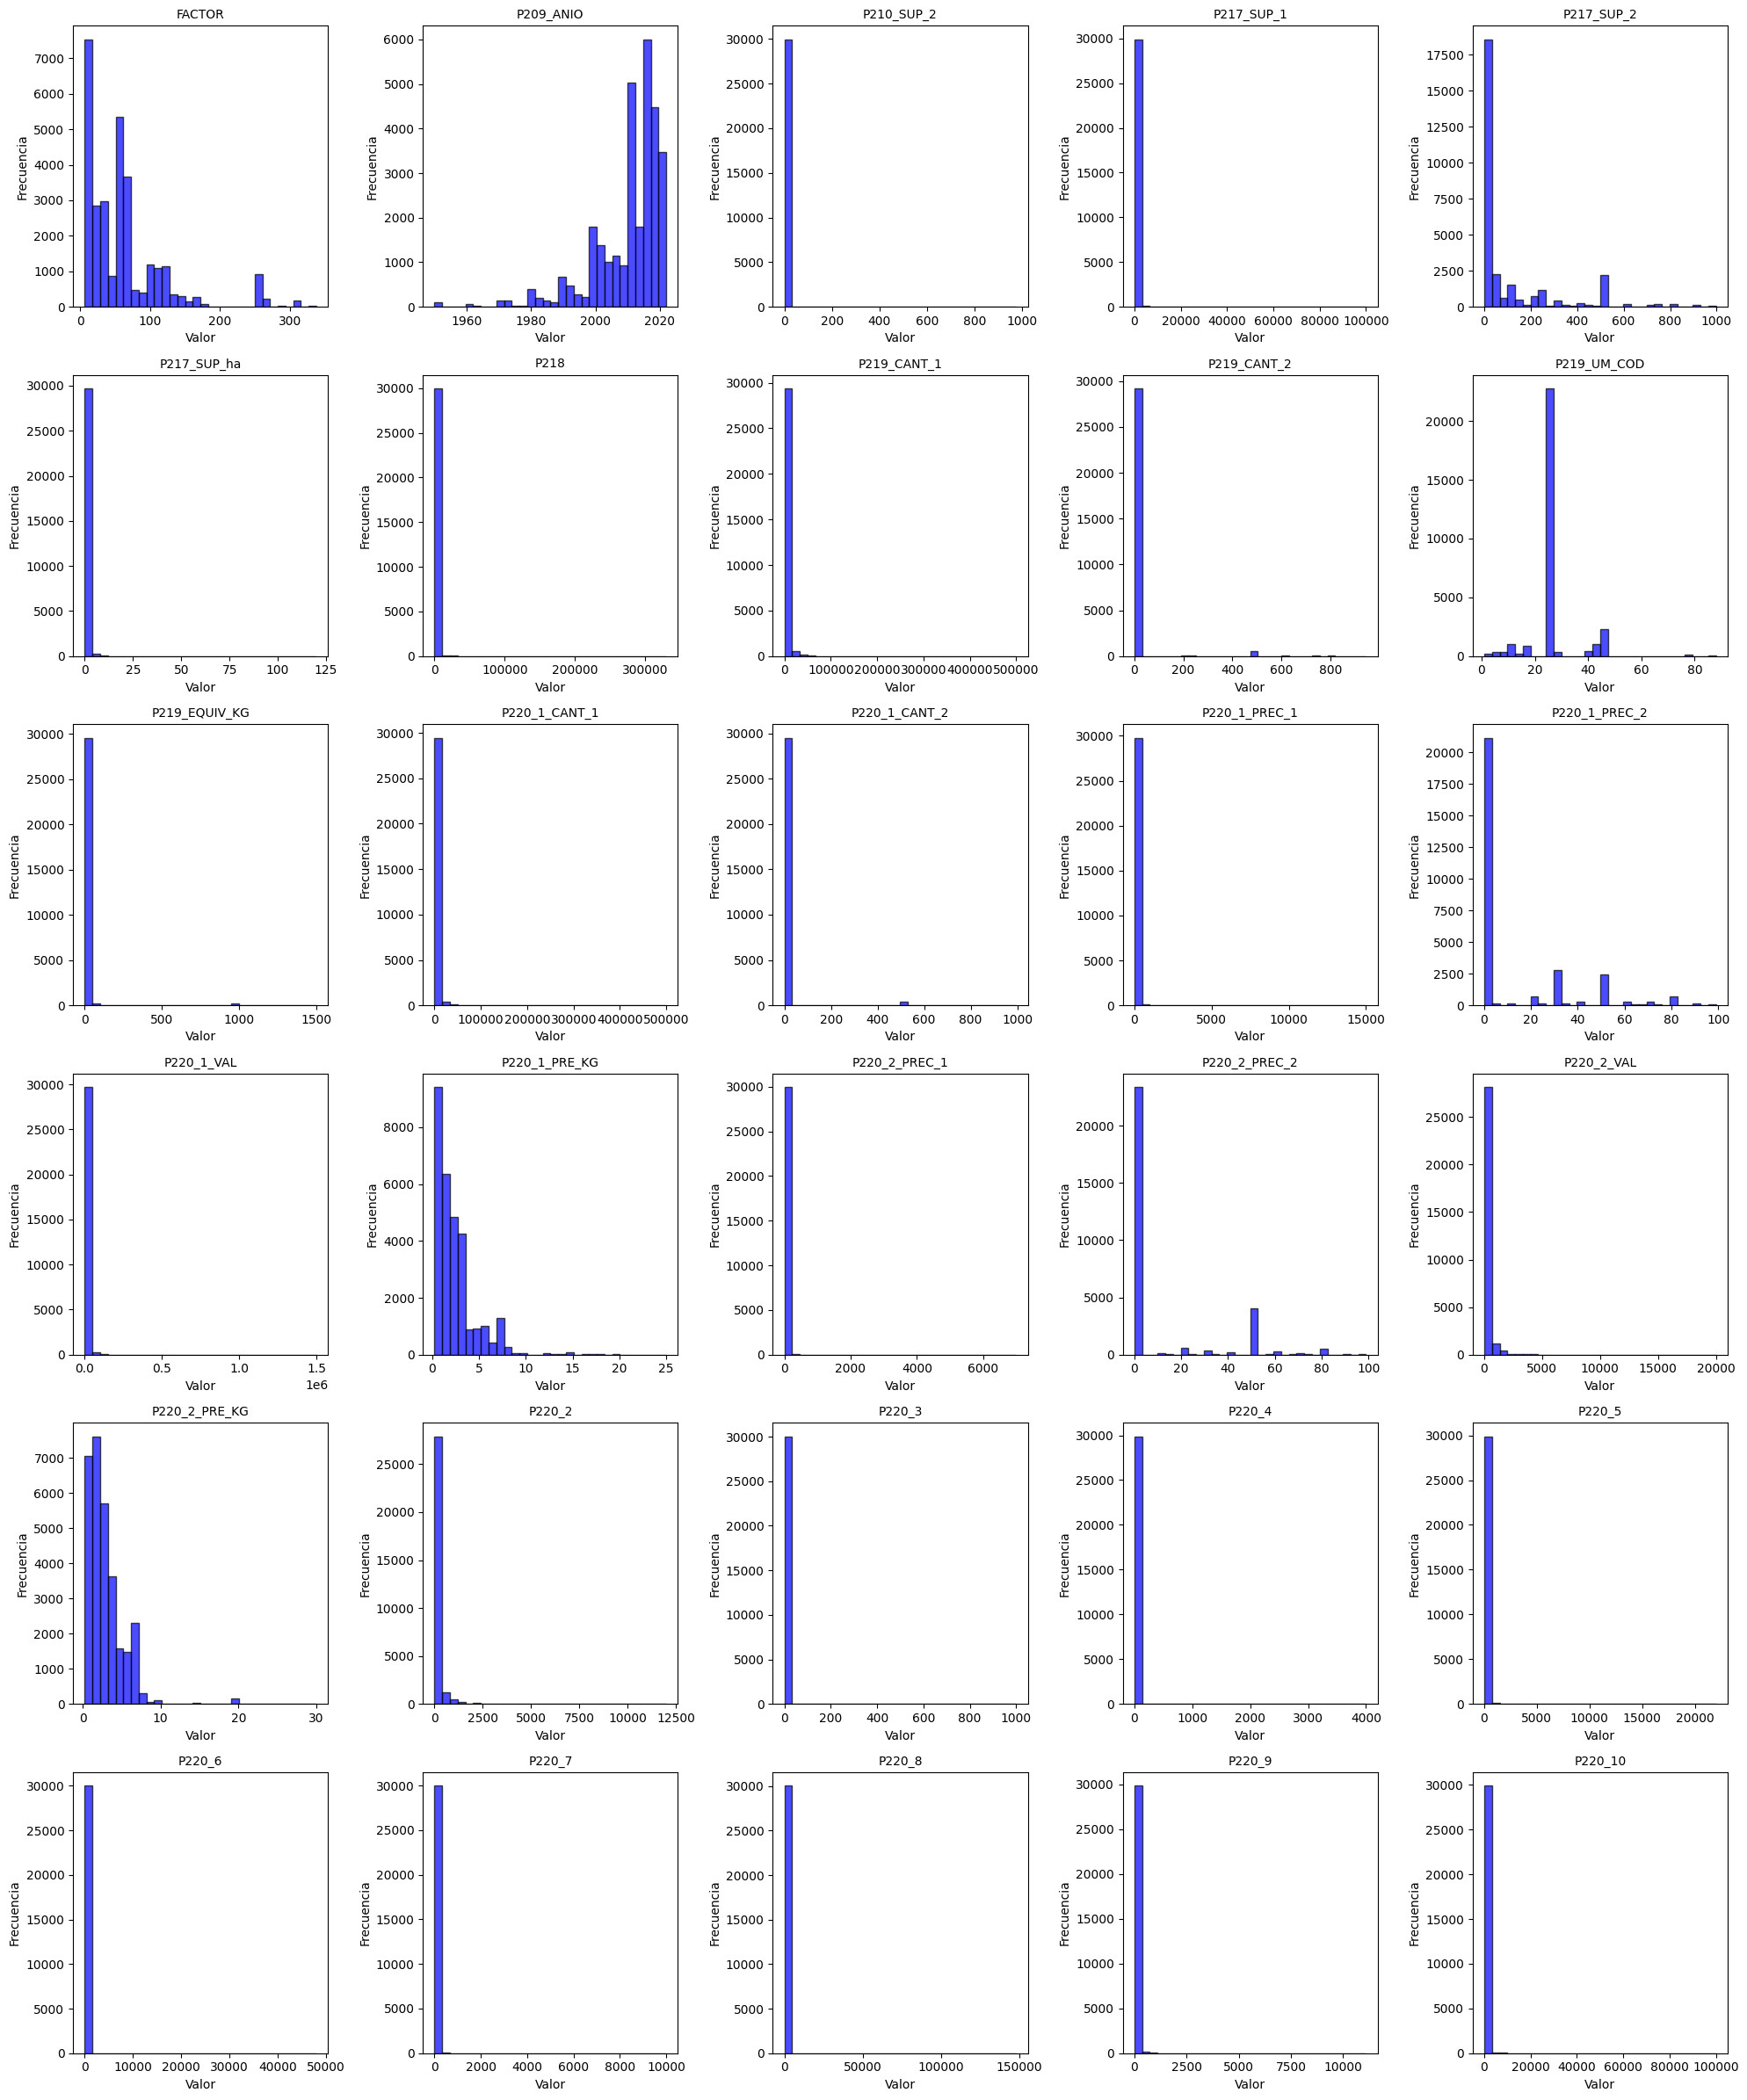

In [20]:
# Configurar el grid de subplots
num_columns = 5  # Número de columnas en el grid
num_rows = (len(numerical_variables) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 4))
axes = axes.flatten()  # Aplanar el grid de subplots

# Generar histogramas para cada variable
for i, column in enumerate(numerical_variables):
    axes[i].hist(data[column].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

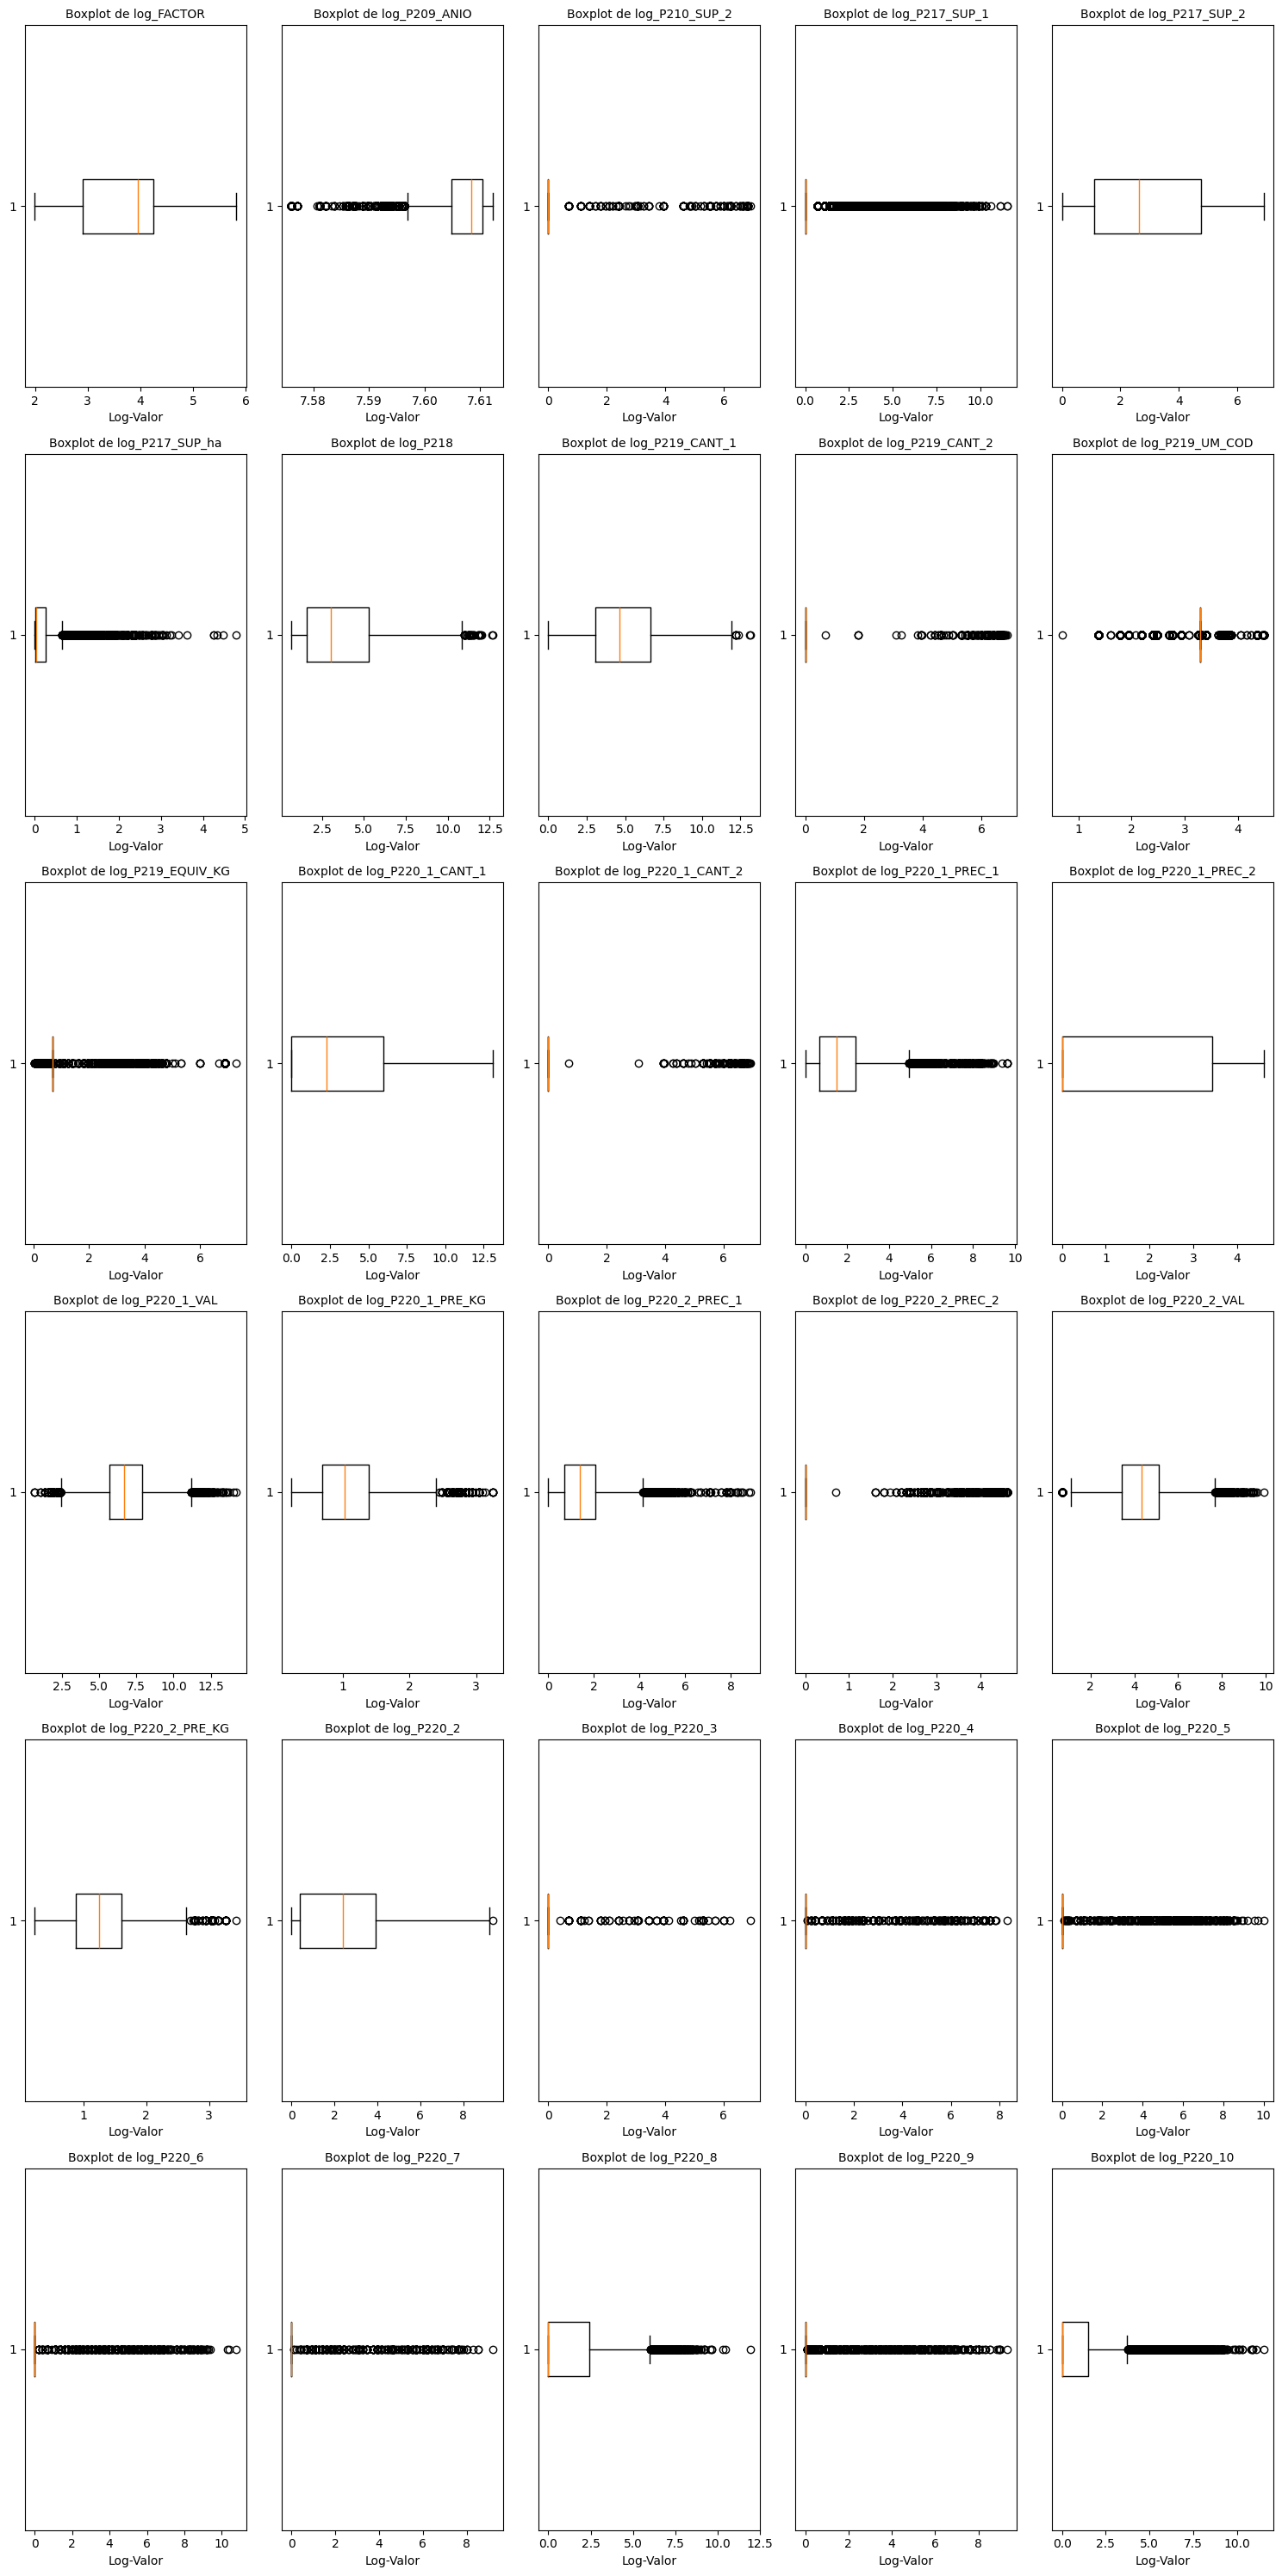

In [21]:
# Crear una copia del dataset para no alterar los valores originales
data_transformed = data.copy()

# Aplicar log-transform a las variables numéricas
for col in numerical_variables:
    data_transformed[f'log_{col}'] = np.log1p(data_transformed[col])
    
# Configurar el grid de subplots
num_vars = len(numerical_variables)
num_cols = 5
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Generar boxplots para las variables transformadas
for i, col in enumerate(numerical_variables):
    log_col = f'log_{col}'
    axes[i].boxplot(data_transformed[log_col].dropna(), vert=False)
    axes[i].set_title(f"Boxplot de {log_col}", fontsize=10)
    axes[i].set_xlabel("Log-Valor")

plt.tight_layout()
plt.show()


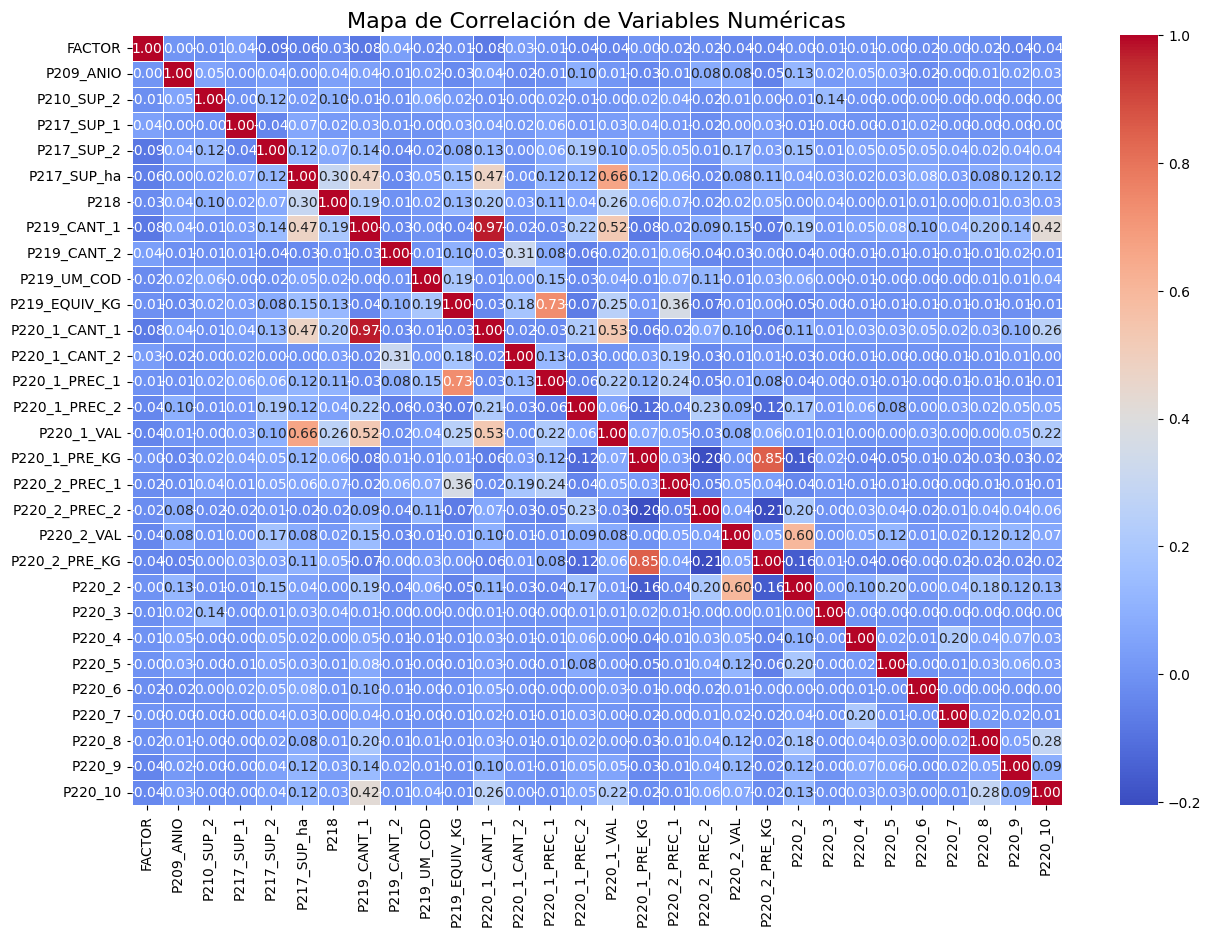

In [22]:
# Matriz de correlación
corr_matrix = data[numerical_variables].corr()

# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 10))  # Cambia los valores para ajustar ancho y alto
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título opcional
plt.title("Mapa de Correlación de Variables Numéricas", fontsize=16)
plt.show()

In [23]:
# Calcular la matriz de correlación
correlation_matrix = data[numerical_variables].corr()

# Seleccionar las variables que tienen alta correlación (mayor a 0.9)
high_correlation = correlation_matrix.abs() > 0.9

# Excluir la diagonal principal (autocorrelación)
np.fill_diagonal(high_correlation.values, False)

# Identificar pares de variables altamente correlacionadas
redundant_pairs = high_correlation[high_correlation].stack().index.tolist()
print("Pares de variables altamente correlacionadas:", redundant_pairs)

# Seleccionar una de cada par de variables redundantes
# Se puede optimizar esta selección, aquí eliminamos automáticamente las últimas en cada par
redundant_vars = set([pair[1] for pair in redundant_pairs])
print("Variables redundantes a eliminar:", redundant_vars)

# Eliminar variables redundantes del dataset
data_reduced = data.drop(columns=redundant_vars)

# Verificar VIF nuevamente con las variables reducidas
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_vars_reduced = list(set(numerical_variables) - redundant_vars)
X_reduced = data_reduced[numerical_vars_reduced]
X_reduced['Intercept'] = 1

vif_data_reduced = pd.DataFrame()
vif_data_reduced['Variable'] = X_reduced.columns
vif_data_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Excluir la constante de la tabla de resultados
vif_data_reduced = vif_data_reduced[vif_data_reduced['Variable'] != 'Intercept']
print("VIF después de eliminar redundancia:\n", vif_data_reduced)


Pares de variables altamente correlacionadas: [('P219_CANT_1', 'P220_1_CANT_1'), ('P220_1_CANT_1', 'P219_CANT_1')]
Variables redundantes a eliminar: {'P220_1_CANT_1', 'P219_CANT_1'}


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15460\563668899.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced['Intercept'] = 1


VIF después de eliminar redundancia:
          Variable       VIF
0      P220_2_VAL  1.688950
1     P217_SUP_ha  1.964604
2            P218  1.131961
3          P220_4  1.061117
4          P220_8  1.134764
5          P220_3  1.022505
6         P220_10  1.180641
7   P220_1_CANT_2  1.159491
8   P220_2_PREC_2  1.152369
9   P220_1_PRE_KG  3.766294
10  P220_1_PREC_1  2.236249
11         P220_7  1.046024
12    P219_CANT_2  1.116484
13         P220_9  1.046071
14      P209_ANIO  1.034628
15  P220_1_PREC_2  1.156621
16     P220_1_VAL  2.009357
17         FACTOR  1.023404
18     P217_SUP_1  1.014613
19         P220_2  1.843903
20    P219_UM_COD  1.082164
21     P210_SUP_2  1.057768
22  P220_2_PREC_1  1.187312
23         P220_6  1.011638
24         P220_5  1.044866
25  P220_2_PRE_KG  3.789723
26  P219_EQUIV_KG  2.508183
27     P217_SUP_2  1.127696


In [24]:
from scipy.stats import f_oneway

# Lista de variables numéricas (ajusta según tu dataset)
numerical_vars = ['P220_5', 'P220_9', 'P220_2', 'P219_EQUIV_KG', 'P220_3', 
                  'P220_1_CANT_2', 'P219_UM_COD', 'P220_2_VAL', 'P220_1_PREC_1', 
                  'P220_1_PREC_2', 'FACTOR', 'P220_2_PRE_KG', 'P220_4', 
                  'P219_CANT_2', 'P220_2_PREC_1', 'P209_ANIO', 'P220_1_PRE_KG', 
                  'P220_8', 'P217_SUP_ha', 'P218', 'P220_1_VAL', 'P217_SUP_1', 
                  'P220_7', 'P217_SUP_2', 'P220_6', 'P220_10', 'P220_2_PREC_2', 
                  'P210_SUP_2']

# Realizar ANOVA para cada variable
anova_results = []
for var in numerical_vars:
    class_0 = data[data['high_profit'] == 0][var]
    class_1 = data[data['high_profit'] == 1][var]
    f_stat, p_val = f_oneway(class_0, class_1)
    anova_results.append({'Variable': var, 'F-statistic': f_stat, 'p-value': p_val})

# Convertir resultados a DataFrame para mejor visualización
anova_results_df = pd.DataFrame(anova_results)

# Filtrar variables con p-value significativo (e.g., p <= 0.05)
significant_vars = anova_results_df[anova_results_df['p-value'] <= 0.05]
print("Variables significativas según ANOVA:")
print(significant_vars)


Variables significativas según ANOVA:
         Variable  F-statistic        p-value
0          P220_5   109.557135   1.355814e-25
1          P220_9    81.488081   1.865543e-19
2          P220_2   767.992932  6.154186e-167
3   P219_EQUIV_KG   233.059044   2.017798e-52
4          P220_3    18.117633   2.082978e-05
5   P220_1_CANT_2   100.693444   1.169899e-23
6     P219_UM_COD    21.080657   4.421309e-06
7      P220_2_VAL  1194.357094  1.083192e-256
8   P220_1_PREC_1   191.264442   2.286343e-43
9   P220_1_PREC_2  2425.331859   0.000000e+00
10         FACTOR   104.803977   1.479441e-24
11  P220_2_PRE_KG   483.910415  2.080941e-106
12         P220_4    10.878845   9.738171e-04
13    P219_CANT_2   129.520407   6.008477e-30
14  P220_2_PREC_1    60.300217   8.401613e-15
15      P209_ANIO   624.515345  1.923929e-136
16  P220_1_PRE_KG   564.877122  1.011106e-123
17         P220_8    11.801439   5.926480e-04
18    P217_SUP_ha  1861.383193   0.000000e+00
19           P218   377.050837   1.771944e

### Variables Categóricas

In [25]:
# Convertir variables categóricas a tipo categoría
for col in categorical_variables:
    data_reduced[col] = data_reduced[col].astype('category')

for var in categorical_variables:
    print(f"{var} - Categorías únicas: {data[var].nunique()}")

NOMBREDD - Categorías únicas: 24
NOMBREPV - Categorías únicas: 177
NOMBREDI - Categorías únicas: 786
REGION - Categorías únicas: 3
DOMINIO - Categorías únicas: 7
P102_2 - Categorías únicas: 2
P204_NOM - Categorías únicas: 86
P204_TIPO - Categorías únicas: 3
P205_N - Categorías únicas: 2
P205_TOT - Categorías únicas: 2
P206_INI_MES - Categorías únicas: 12
P206_INI_ANIO - Categorías únicas: 2
P207_FIN_MES - Categorías únicas: 12
P207_FIN_ANIO - Categorías únicas: 2
P208 - Categorías únicas: 4
P209_MES - Categorías únicas: 12
P210_SUP_1 - Categorías únicas: 9
P211_1 - Categorías únicas: 2
P211_2 - Categorías únicas: 2
P211_3 - Categorías únicas: 2
P211_4 - Categorías únicas: 2
P211_5 - Categorías únicas: 2
P211_6 - Categorías únicas: 2
P211_7 - Categorías únicas: 2
P211_8 - Categorías únicas: 2
P212 - Categorías únicas: 7
P213 - Categorías únicas: 8
P219_UM - Categorías únicas: 32
P222_1 - Categorías únicas: 2
P222_2 - Categorías únicas: 2
P222_3 - Categorías únicas: 2
P222_4 - Categorías

In [27]:
# Función para calcular V de Cramer
def cramers_v(chi2, n, k1, k2):
    if min(k1 - 1, k2 - 1) == 0:  # Verifica para evitar divisiones por cero
        return 0
    return np.sqrt(chi2 / (n * (min(k1 - 1, k2 - 1))))

results = []
n = len(data)

for var in categorical_variables:
    contingency_table = pd.crosstab(data[var], data['high_profit'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    k1, k2 = contingency_table.shape
    v_cramer = cramers_v(chi2, n, k1, k2)
    results.append({'Variable': var, 'Chi2': chi2, 'p-value': p, 'V_Cramer': v_cramer})

results_df = pd.DataFrame(results)
print(results_df)

# Filtrar variables con V de Cramer bajo (e.g., V < 0.1) o alto p-value (e.g., p > 0.05)
filtered_vars = results_df[(results_df['V_Cramer'] >= 0.1) & (results_df['p-value'] <= 0.05)]
selected_vars = filtered_vars['Variable'].tolist()
print("Variables seleccionadas según V de Cramer y Chi-cuadrado:", selected_vars)

# Reducción por redundancia (opcional)
# Calcular la matriz de correlación categórica
categorical_encoded = pd.get_dummies(data[selected_vars], drop_first=True)
correlation_matrix = categorical_encoded.corr()

# Identificar redundancia
redundant_vars = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.9:  # Threshold de redundancia
            redundant_vars.append(correlation_matrix.columns[i])

redundant_vars = set(redundant_vars)
print("Variables categóricas redundantes:", redundant_vars)

# Eliminar variables redundantes
final_selected_vars = [var for var in selected_vars if var not in redundant_vars]
print("Variables finales categóricas seleccionadas:", final_selected_vars)


         Variable          Chi2        p-value  V_Cramer
0        NOMBREDD   2806.134935   0.000000e+00  0.305362
1        NOMBREPV   4281.240248   0.000000e+00  0.377177
2        NOMBREDI   6192.771660   0.000000e+00  0.453631
3          REGION    921.435894  8.179711e-201  0.174982
4         DOMINIO   1271.685247  1.459126e-271  0.205565
5          P102_2     59.315455   1.343175e-14  0.044396
6        P204_NOM  13439.918550   0.000000e+00  0.668280
7       P204_TIPO   5766.372910   0.000000e+00  0.437735
8          P205_N      2.274729   1.314981e-01  0.008694
9        P205_TOT     15.260468   9.365622e-05  0.022519
10   P206_INI_MES   3772.126365   0.000000e+00  0.354041
11  P206_INI_ANIO   2762.961465   0.000000e+00  0.303003
12   P207_FIN_MES   3366.460349   0.000000e+00  0.334462
13  P207_FIN_ANIO    225.447431   5.864411e-51  0.086553
14           P208   6855.708595   0.000000e+00  0.477294
15       P209_MES    184.877304   1.007662e-33  0.078379
16     P210_SUP_1     59.597157

### Feature Engineering 

In [28]:
# Relación entre superficie cosechada y producción total
data['produccion_area_ratio'] = data['P219_EQUIV_KG'] / (data['P210_SUP_2'] + 1e-6)
# Relación entre precio unitario y valor total
data['precio_valor_ratio'] = data['P220_1_PREC_1'] / (data['P220_1_VAL'] + 1e-6)
# Duración entre la siembra y la cosecha

def calculate_duration(start_month, start_year, end_month, end_year):
    return (end_year - start_year) * 12 + (end_month - start_month)

data['duracion_cosecha_meses'] = data.apply(lambda row: calculate_duration(row['P206_INI_MES'], row['P206_INI_ANIO'], row['P207_FIN_MES'], row['P207_FIN_ANIO']), axis=1)

In [31]:
# Variables seleccionadas
numerical_vars = [
    'P220_5', 'P220_9', 'P220_2', 'P220_3', 
    'P220_1_CANT_2', 'P219_UM_COD', 'P220_2_VAL',  
    'P220_1_PREC_2', 'FACTOR', 'P220_2_PRE_KG', 'P220_4', 'P219_CANT_2',
    'P220_2_PREC_1', 'P209_ANIO', 'P220_1_PRE_KG', 'P220_8', 
    'P217_SUP_ha', 'P218', 'P217_SUP_1', 'P220_7', 'P217_SUP_2', 'P220_6', 'P220_10', 
    'duracion_cosecha_meses', 'produccion_area_ratio', 'precio_valor_ratio'
]

categorical_vars = [
    'REGION', 'P204_NOM', 'P204_TIPO', 'P208', 'P212', 
    'P222_1', 'P222_2', 'P222_6', 'P223_2', 'P223_3', 'P223_5'
]

# Crear una lista combinada de variables
selected_vars = numerical_vars + categorical_vars

# Dividir datos en entrenamiento y prueba
X = data[selected_vars]
y = data['high_profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.to_csv("../01_Data/X_train.csv",index=False)
X_test.to_csv("../01_Data/X_test.csv",index=False)
y_train.to_csv("../01_Data/y_train.csv",index=False)
y_test.to_csv("../01_Data/y_test.csv",index=False)